In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
!ls

classif_facies_vec.ipynb  facies_vector_edit.csv  facies_vectors.csv


In [3]:
df = pd.read_csv("facies_vector_edit.csv")

In [4]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0,1
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0,1
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0,1
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0,1
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Facies           4149 non-null   int64  
 1   Formation        4149 non-null   object 
 2   Well Name        4149 non-null   object 
 3   Depth            4149 non-null   float64
 4   GR               4149 non-null   float64
 5   ILD_log10        4149 non-null   float64
 6   DeltaPHI         4149 non-null   float64
 7   PHIND            4149 non-null   float64
 8   PE               3232 non-null   float64
 9   NM_M             4149 non-null   int64  
 10  RELPOS           4149 non-null   float64
 11  Labels_char      4149 non-null   object 
 12  PHID             4149 non-null   float64
 13  PHIN             4149 non-null   float64
 14  Formation_num    4149 non-null   float64
 15  Formation_numsk  4149 non-null   int64  
dtypes: float64(10), int64(3), object(3)
memory usage: 518.8+ KB


In [6]:
columns = ['GR','ILD_log10','DeltaPHI','PHIND','NM_M'
           ,'RELPOS','PHID','PHIN','Formation_num']

In [7]:
df[columns].head()

,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,PHID,PHIN,Formation_num
0,77.45,0.664,9.9,11.915,1,1.000,6.965,16.865,1.0
1,78.26,0.661,14.2,12.565,1,0.979,5.465,19.665,1.0
2,79.05,0.658,14.8,13.050,1,0.957,5.650,20.450,1.0
3,86.10,0.655,13.9,13.115,1,0.936,6.165,20.065,1.0
4,74.58,0.647,13.5,13.300,1,0.915,6.550,20.050,1.0


In [8]:
df_reg = df[~df['PE'].isnull()]

In [9]:
X = df_reg[columns]
y = df_reg['PE']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
knnr = KNeighborsRegressor()

In [12]:
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
print('Erro treinamento')
print(mean_squared_error(y_train,knnr.predict(X_train)))
print('')
print('Erro teste')
print(mean_squared_error(y_test,knnr.predict(X_test)))

Erro treinamento
0.19444973125412543

Erro teste
0.3346668673267327


In [14]:
mse_train = []
mse_test = []
for k in range(3,100,2):
    knnr = KNeighborsRegressor(n_neighbors=k,n_jobs=-1)
    knnr.fit(X_train, y_train)
    mse_train.append(mean_squared_error(y_train,knnr.predict(X_train)))
    mse_test.append(mean_squared_error(y_test,knnr.predict(X_test)))

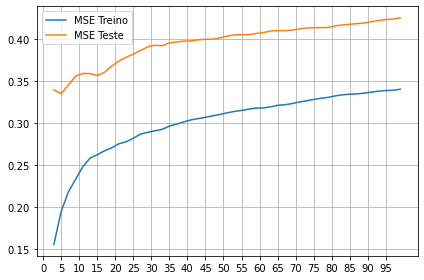

In [51]:
plt.plot(np.arange(3,100,2),mse_train,label='MSE Treino')
plt.plot(np.arange(3,100,2),mse_test,label='MSE Teste')
plt.xticks(np.arange(0,100,5))
plt.legend()
plt.grid()
plt.tight_layout()

In [16]:
df['PE_reg'] = df['PE'].copy()
df['PE_reg'][df['PE'].isnull()] = knnr.predict(df[columns][df['PE'].isnull()])

/home/jonh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Facies           4149 non-null   int64  
 1   Formation        4149 non-null   object 
 2   Well Name        4149 non-null   object 
 3   Depth            4149 non-null   float64
 4   GR               4149 non-null   float64
 5   ILD_log10        4149 non-null   float64
 6   DeltaPHI         4149 non-null   float64
 7   PHIND            4149 non-null   float64
 8   PE               3232 non-null   float64
 9   NM_M             4149 non-null   int64  
 10  RELPOS           4149 non-null   float64
 11  Labels_char      4149 non-null   object 
 12  PHID             4149 non-null   float64
 13  PHIN             4149 non-null   float64
 14  Formation_num    4149 non-null   float64
 15  Formation_numsk  4149 non-null   int64  
 16  PE_reg           4149 non-null   float64
dtypes: float64(11)

In [18]:
columns = ['GR','ILD_log10','DeltaPHI','PHIND','NM_M'
           ,'RELPOS','PHID','PHIN','Formation_num','PE_reg']

In [19]:
X = df[columns]
y = df['Facies']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
dtc = DecisionTreeClassifier(max_depth=4)

In [62]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [64]:
print('Atributo \t Importância do atributo')
for i,j in sorted(zip(dtc.feature_importances_,X_train.columns)):
    print('%s \t\t %s'%(j,i))

Atributo 	 Importância do atributo
PHID 		 0.0
DeltaPHI 		 0.013234223631612687
Formation_num 		 0.01853524780676986
RELPOS 		 0.02122218610955214
PHIND 		 0.057483997202283525
PE_reg 		 0.06551819341199087
ILD_log10 		 0.07539685634432951
GR 		 0.10600985814133027
PHIN 		 0.13066189283230253
NM_M 		 0.5119375445198288


In [65]:
columns = ['GR','ILD_log10','PHIND','NM_M','RELPOS','PHIN','PE_reg']

In [92]:
columns = ['GR','ILD_log10','DeltaPHI','PHIND','NM_M'
           ,'RELPOS','PHID','PHIN','Formation_num','PE_reg']

In [93]:
X = df[columns]
y = df['Facies']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [96]:
pca = PCA()
pca.fit(scaler.transform(X_train))

PCA()

In [97]:
for i,comp in enumerate(pca.explained_variance_ratio_):
    print("Comp.%i: %f - %f"%(i+1, comp*100, pca.explained_variance_ratio_[:i+1].sum()*100))

Comp.1: 41.507367 - 41.507367
Comp.2: 15.484642 - 56.992009
Comp.3: 10.786287 - 67.778296
Comp.4: 10.284840 - 78.063136
Comp.5: 7.620906 - 85.684042
Comp.6: 6.202124 - 91.886167
Comp.7: 5.074559 - 96.960725
Comp.8: 3.039275 - 100.000000
Comp.9: 0.000000 - 100.000000
Comp.10: 0.000000 - 100.000000


In [113]:
n_comps = 7

In [114]:
X_train_pca =  pca.transform(scaler.transform(X_train))[:,:n_comps]

In [115]:
X_train_pca.shape

(3111, 7)

In [116]:
labels = np.stack((df.Labels_char.unique(),df.Facies.unique()),axis=1)
lb = pd.DataFrame(labels)
labels_name=list(lb.sort_values(by=1)[0])

In [117]:
X_test_pca = pca.transform(scaler.transform(X_test))[:,:n_comps]

In [118]:
rfc = RandomForestClassifier()

In [119]:
rfc.fit(X_train_pca, y_train)

RandomForestClassifier()

In [120]:
print(classification_report(y_train,rfc.predict(X_train_pca),target_names=labels_name))

                                        precision    recall  f1-score   support

                   Nonmarine sandstone       1.00      1.00      1.00       203
            Nonmarine coarse siltstone       1.00      1.00      1.00       686
              Nonmarine fine siltstone       1.00      1.00      1.00       593
            Marine siltstone and shale       1.00      1.00      1.00       206
                  Mudstone (limestone)       1.00      1.00      1.00       230
                Wackestone (limestone)       1.00      1.00      1.00       430
                              Dolomite       0.98      1.00      0.99       100
      Packstone-grainstone (limestone)       1.00      1.00      1.00       527
Phylloid-algal bafflestone (limestone)       1.00      0.99      0.99       136

                              accuracy                           1.00      3111
                             macro avg       1.00      1.00      1.00      3111
                          weighted avg

In [121]:
print(classification_report(y_test,rfc.predict(X_test_pca),target_names=labels_name))

                                        precision    recall  f1-score   support

                   Nonmarine sandstone       0.89      0.62      0.73        65
            Nonmarine coarse siltstone       0.75      0.83      0.79       254
              Nonmarine fine siltstone       0.74      0.75      0.74       187
            Marine siltstone and shale       0.71      0.85      0.77        65
                  Mudstone (limestone)       0.53      0.47      0.50        66
                Wackestone (limestone)       0.67      0.63      0.65       152
                              Dolomite       0.91      0.51      0.66        41
      Packstone-grainstone (limestone)       0.69      0.77      0.73       159
Phylloid-algal bafflestone (limestone)       0.92      0.73      0.82        49

                              accuracy                           0.73      1038
                             macro avg       0.76      0.69      0.71      1038
                          weighted avg

In [122]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

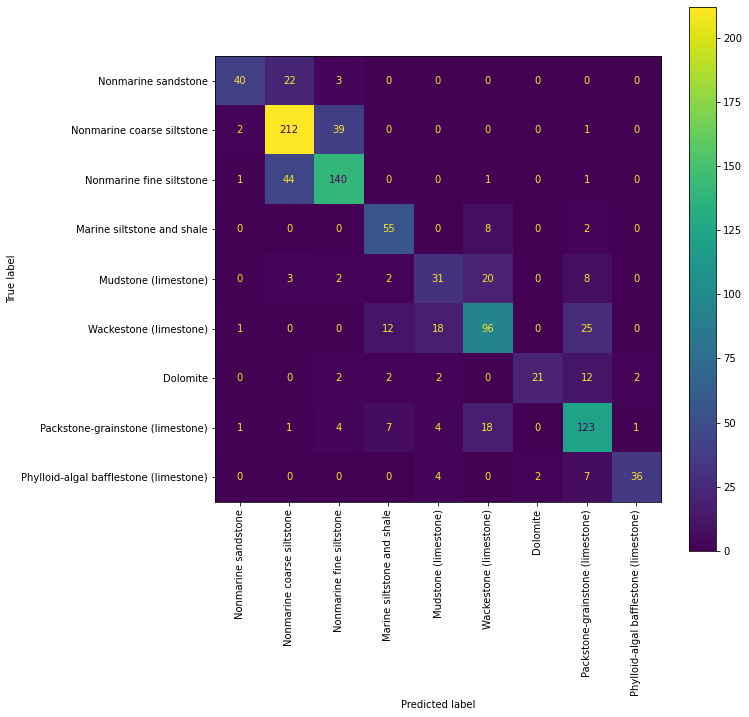

In [123]:
fig,axes = plt.subplots(figsize=(10,10))
plot_confusion_matrix(rfc,X_test_pca,y_test,display_labels=labels_name,xticks_rotation='vertical',ax=axes)

In [134]:
knnc = KNeighborsClassifier(n_neighbors=3,p=4)

In [135]:
knnc.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3, p=4)

In [136]:
print(classification_report(y_train,knnc.predict(X_train_pca),target_names=labels_name))

                                        precision    recall  f1-score   support

                   Nonmarine sandstone       0.84      0.91      0.87       203
            Nonmarine coarse siltstone       0.89      0.90      0.90       686
              Nonmarine fine siltstone       0.89      0.90      0.89       593
            Marine siltstone and shale       0.78      0.91      0.84       206
                  Mudstone (limestone)       0.77      0.76      0.77       230
                Wackestone (limestone)       0.85      0.82      0.84       430
                              Dolomite       0.89      0.84      0.87       100
      Packstone-grainstone (limestone)       0.91      0.83      0.87       527
Phylloid-algal bafflestone (limestone)       0.94      0.94      0.94       136

                              accuracy                           0.87      3111
                             macro avg       0.86      0.87      0.86      3111
                          weighted avg

In [137]:
print(classification_report(y_test,knnc.predict(X_test_pca),target_names=labels_name))

                                        precision    recall  f1-score   support

                   Nonmarine sandstone       0.69      0.85      0.76        65
            Nonmarine coarse siltstone       0.78      0.80      0.79       254
              Nonmarine fine siltstone       0.75      0.73      0.74       187
            Marine siltstone and shale       0.64      0.83      0.72        65
                  Mudstone (limestone)       0.62      0.59      0.60        66
                Wackestone (limestone)       0.64      0.65      0.65       152
                              Dolomite       0.84      0.66      0.74        41
      Packstone-grainstone (limestone)       0.76      0.65      0.71       159
Phylloid-algal bafflestone (limestone)       0.85      0.84      0.85        49

                              accuracy                           0.73      1038
                             macro avg       0.73      0.73      0.73      1038
                          weighted avg

In [141]:
accuracy_train = []
accuracy_test = []
for k in range(3,100,2):
    knnc = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knnc.fit(X_train_pca,y_train)
    accuracy_train.append(accuracy_score(y_train,knnc.predict(X_train_pca)))
    accuracy_test.append(accuracy_score(y_test,knnc.predict(X_test_pca)))

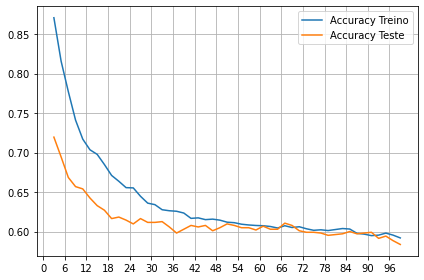

In [142]:
plt.plot(np.arange(3,100,2),accuracy_train,label='Accuracy Treino')
plt.plot(np.arange(3,100,2),accuracy_test,label='Accuracy Teste')
plt.legend()
plt.xticks(np.arange(0,100,6))
plt.grid()
plt.tight_layout()

In [131]:
accuracy_train = []
accuracy_test = []
for i in range(1,10):
    knnc = KNeighborsClassifier(n_neighbors=3,p=i,n_jobs=-1)
    knnc.fit(X_train_pca,y_train)
    accuracy_train.append(accuracy_score(y_train,knnc.predict(X_train_pca)))
    accuracy_test.append(accuracy_score(y_test,knnc.predict(X_test_pca)))

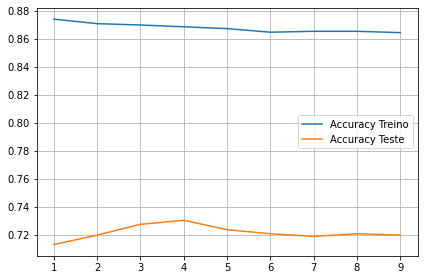

In [133]:
plt.plot(np.arange(1,10),accuracy_train,label='Accuracy Treino')
plt.plot(np.arange(1,10),accuracy_test,label='Accuracy Teste')
plt.legend()
plt.xticks(np.arange(1,10))
plt.grid()
plt.tight_layout()